In [1]:
#start out by importing all the relevant libraries, tools, and functions
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import our data by uploading into google colab
from google.colab import files
uploaded = files.upload()

Saving NYPD_Arrest_Data.csv to NYPD_Arrest_Data.csv


In [24]:
#read our CSV and set up our initial dataframe
df = pd.read_csv("NYPD_Arrest_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [25]:
#just checking to see if we imported correctly and then looking to see the names of columns available
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [26]:
#now it's time to clean up the data
#I'm dropping columns that are not relevant to my analysis
df=df.drop(df.columns[[2,3,4,5,6,9,10,11,14,15,16,17,18]],axis=1)
#I'm also renaming my target columns to make them easier for me to understand and manipulate in my code
df.rename(columns={"ARREST_KEY": "ID", "ARREST_DATE": "Date","LAW_CAT_CD":"Level","ARREST_BORO":"Boro","PERP_SEX":"Gender","PERP_RACE":"Race"}, inplace=True)
#check to make sure the dropping and renaming worked correctly
df.head()

,ID,Date,Level,Boro,Gender,Race
0,238013474,12/18/2021,F,Q,M,BLACK
1,236943583,11/25/2021,F,K,M,BLACK
2,234938876,10/14/2021,F,K,M,WHITE
3,234788259,10/11/2021,F,B,M,BLACK
4,234188790,09/28/2021,M,B,M,BLACK


In [43]:
#This code is the most important for my analysis
#It does 2 things:
#First, I am grouping by my key factors into two groups (Borough and Level to determine the safest place to live) and (Race and Gender for demographic analysis)
#Second, I am converting the counts from those groupby functions into their own dataframe so I can manipulate and plot the resulting counts in my charts
df_race = df.reset_index().groupby( ['Race','Gender'],as_index=False ).count()
df_level = df.reset_index().groupby( ['Boro','Level'],as_index=False ).count()

In [45]:
#Checking the output for my location analysis
df_level.head()

,Boro,Level,index,ID,Date,Gender,Race
0,B,F,14907,14907,14907,14907,14907
1,B,I,31,31,31,31,31
2,B,M,18685,18685,18685,18685,18685
3,B,V,40,40,40,40,40
4,K,F,20947,20947,20947,20947,20947


In [44]:
#checking the output for my demographic analysis
df_race.head()

,Race,Gender,index,ID,Date,Level,Boro
0,AMERICAN INDIAN/ALASKAN NATIVE,F,67,67,67,67,67
1,AMERICAN INDIAN/ALASKAN NATIVE,M,376,376,376,376,376
2,ASIAN / PACIFIC ISLANDER,F,1420,1420,1420,1402,1420
3,ASIAN / PACIFIC ISLANDER,M,7173,7173,7173,7087,7173
4,BLACK,F,13407,13407,13407,13383,13407


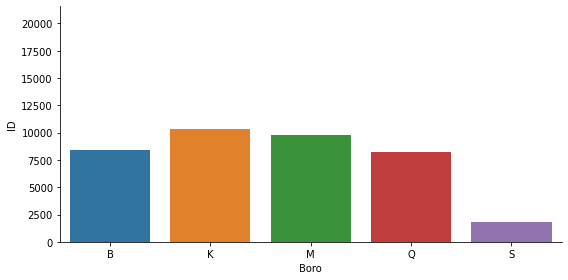

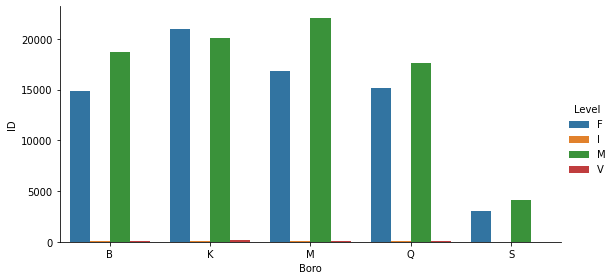

In [49]:
#Time for the actual plotting and analysis
#For my location analysis I am first plotting the counts of arrests by borough to determine which of the 5 NYC boroughs has the most
sns.set_palette('tab10')
sns.catplot(y='ID',
            x='Boro', 
            data=df_level,  
            kind='bar', 
            height=4,
            aspect=2,
            palette='tab10',
            errwidth=0)
#Secondly I am separating those arrests by level to determine if there are more Felonies or Misdemeanors
#This will give me another layer of insight into the arrests so that we don't just look at count
sns.catplot(y='ID',
            x='Boro', 
            data=df_level, 
            hue='Level', 
            kind='bar', 
            height=4,
            aspect=2,
            palette='tab10',
            errwidth=0)

Analyzing the plots it first appears that Brooklyn and Manhattan are neck and neck for being the most dangerous. However, the deeper level of analysis shows that a much larger % of Brooklyn's arrests were for Felonies, a higher level of arrest whereas Manahattana (and also Queens and the Bronx) have much more Misdemeanors, which are less serious. From the data we can clearly determine that Staten Island is the safest place to live and Brooklyn the most dangerous.

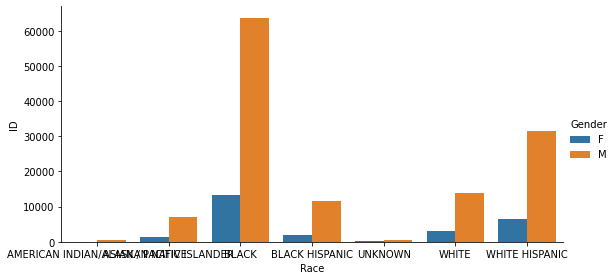

In [47]:
sns.set_palette('tab10')
sns.catplot(y='ID',
            x='Race', 
            data=df_race, 
            hue='Gender', 
            kind='bar', 
            height=4,
            aspect=2,
            palette='tab10',
            errwidth=0)

The demographics are not entirely surprising. It appears that Men tend to be much much more likely than women to commit a crime, or at least to be arrested for it. The race demographics also seem to follow a pattern that aligns to what we hear in the media, namely that Black individuals are much more likely to be arrested than any other race.